In [1]:
import sys
sys.path.append("../")

import os
os.chdir("../")

import warnings
warnings.filterwarnings("ignore")

In [2]:
from text_classification.models import LSTMClassifier, DistilBERTClassifier
from text_classification.datasets import EmotionsDataset

import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

import torch
from torch.utils.data import DataLoader, random_split

In [3]:
sns.set_theme()

# Emotion classification of English Twitter messages

https://huggingface.co/datasets/jeffnyman/emotions

## Long short-term memory (LSTM)

In [4]:
# Model parameters
EMBEDDING_DIM = 200
HIDDEN_SIZE = 400
NUM_LAYERS = 2
DROPOUT = 0.2

# Training parameters
BATCH_SIZE = 256
LEARNING_RATE = 3e-4
NUM_EPOCHS = 50
PATIENCE = 5

In [5]:
dataset = EmotionsDataset("lstm")
train_data, val_data, test_data = random_split(dataset, [0.7, 0.15, 0.15], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [6]:
model = LSTMClassifier(
    num_classes=dataset.num_classes, 
    embedding_dim=EMBEDDING_DIM, 
    hidden_size=HIDDEN_SIZE, 
    num_layers=NUM_LAYERS, 
    dropout=DROPOUT,
)
history = model.fit(train_loader, val_loader, LEARNING_RATE, NUM_EPOCHS, PATIENCE)
model.save("./models/emotions_lstm.pt")

Epoch  1/50: loss=1.5347, accuracy=0.3907, precision=0.1297, recall=0.2028, f1_score=0.1579
Epoch  2/50: loss=1.4017, accuracy=0.4807, precision=0.2781, recall=0.2661, f1_score=0.2296
Epoch  3/50: loss=1.1283, accuracy=0.5958, precision=0.4077, recall=0.4113, f1_score=0.3931
Epoch  4/50: loss=0.9235, accuracy=0.6993, precision=0.5612, recall=0.5334, f1_score=0.5222
Epoch  5/50: loss=0.8095, accuracy=0.7224, precision=0.6539, recall=0.5793, f1_score=0.5845
Epoch  6/50: loss=0.6727, accuracy=0.7795, precision=0.7175, recall=0.6325, f1_score=0.6496
Epoch  7/50: loss=0.6154, accuracy=0.8048, precision=0.7481, recall=0.6970, f1_score=0.7075
Epoch  8/50: loss=0.5430, accuracy=0.8180, precision=0.7705, recall=0.7367, f1_score=0.7442
Epoch  9/50: loss=0.5211, accuracy=0.8332, precision=0.7860, recall=0.7585, f1_score=0.7671
Epoch 10/50: loss=0.5222, accuracy=0.8469, precision=0.8129, recall=0.7707, f1_score=0.7839
Epoch 11/50: loss=0.4641, accuracy=0.8473, precision=0.8030, recall=0.8218, f1_s

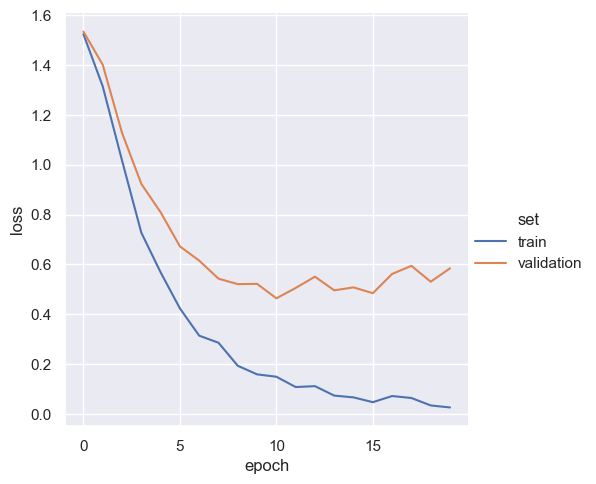

In [7]:
history = pd.DataFrame(history)
g = sns.relplot(history, x="epoch", y="loss", hue="set", kind="line")

In [8]:
y_true, y_pred = [], []
for _, _, labels, text in test_loader:
    y_true += labels.argmax(dim=1).tolist()
    y_pred += model.predict(text)
    
print("Classification report (test set)")
print(classification_report(y_true, y_pred, target_names=dataset.class_names, digits=4))

Classification report (test set)
              precision    recall  f1-score   support

     sadness     0.9161    0.8995    0.9077       886
         joy     0.9049    0.8903    0.8976       994
        love     0.7228    0.7846    0.7524       246
       anger     0.8358    0.8378    0.8368       407
        fear     0.7962    0.8438    0.8193       352
    surprise     0.7692    0.6957    0.7306       115

    accuracy                         0.8643      3000
   macro avg     0.8242    0.8253    0.8241      3000
weighted avg     0.8660    0.8643    0.8648      3000



## DistilBERT

In [10]:
# Training parameters
BATCH_SIZE = 16
LEARNING_RATE = 5e-5
NUM_EPOCHS = 10
PATIENCE = 2

In [11]:
dataset = EmotionsDataset("distilbert")
train_data, val_data, test_data = random_split(
    dataset, [0.7, 0.15, 0.15], generator=torch.Generator().manual_seed(42)
)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [12]:
model = DistilBERTClassifier(num_classes=dataset.num_classes)
history = model.fit(train_loader, val_loader, LEARNING_RATE, NUM_EPOCHS, PATIENCE)
model.save("./models/emotions_distilbert.pt")

Epoch  1/10: loss=0.1562, accuracy=0.9265, precision=0.8831, recall=0.8809, f1_score=0.8729
Epoch  2/10: loss=0.1606, accuracy=0.9285, precision=0.8832, recall=0.8846, f1_score=0.8734
Epoch  3/10: loss=0.1344, accuracy=0.9295, precision=0.8853, recall=0.8829, f1_score=0.8745
Epoch  4/10: loss=0.1426, accuracy=0.9312, precision=0.8835, recall=0.8838, f1_score=0.8743
Epoch  5/10: loss=0.2010, accuracy=0.9272, precision=0.8854, recall=0.8853, f1_score=0.8758
Epoch  6/10: loss=0.2242, accuracy=0.9239, precision=0.8759, recall=0.8795, f1_score=0.8675
Epoch  7/10: loss=0.2261, accuracy=0.9269, precision=0.8702, recall=0.8718, f1_score=0.8618
Early stopping - best model from epoch 5!


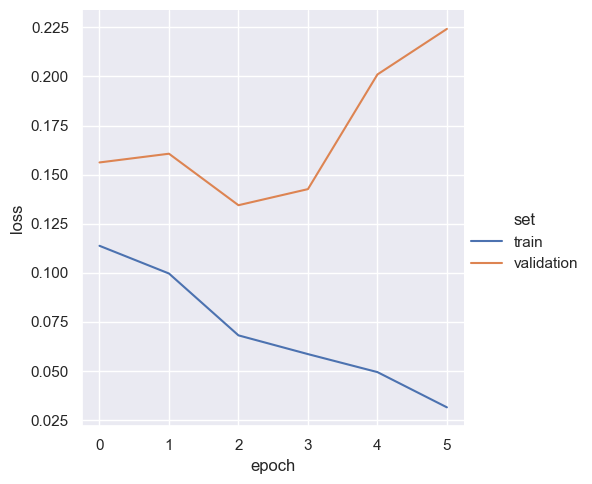

In [13]:
history = pd.DataFrame(history)
g = sns.relplot(history, x="epoch", y="loss", hue="set", kind="line")

In [14]:
y_true, y_pred = [], []
for _, _, labels, text in test_loader:
    y_true += labels.argmax(dim=1).tolist()
    y_pred += model.predict(text)

print("Classification report (test set)")
print(classification_report(y_true, y_pred, target_names=dataset.class_names, digits=4))

Classification report (test set)
              precision    recall  f1-score   support

     sadness     0.9725    0.9594    0.9659       886
         joy     0.9401    0.9477    0.9439       994
        love     0.8110    0.8374    0.8240       246
       anger     0.9661    0.9115    0.9381       407
        fear     0.8519    0.9148    0.8822       352
    surprise     0.8056    0.7565    0.7803       115

    accuracy                         0.9260      3000
   macro avg     0.8912    0.8879    0.8891      3000
weighted avg     0.9271    0.9260    0.9263      3000

